In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import models, layers, callbacks, utils

WORK_PATH = "/root/kaggle-data/mnist-in-csv"

train_dataset = pd.read_csv(WORK_PATH+"/mnist_train.csv")
test_dataset  = pd.read_csv(WORK_PATH+"/mnist_test.csv")

train_dataset.describe()

Y_train = train_dataset["label"]
X_train = train_dataset.drop(labels = ["label"],axis = 1)

Y_test = test_dataset["label"]
X_test = test_dataset.drop(labels = ["label"],axis = 1)


In [2]:
print(Y_train.value_counts())
X_train.isnull().any().describe()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64


count       784
unique        1
top       False
freq        784
dtype: object

In [3]:
print(Y_test.value_counts())
X_test.isnull().any().describe()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64


count       784
unique        1
top       False
freq        784
dtype: object

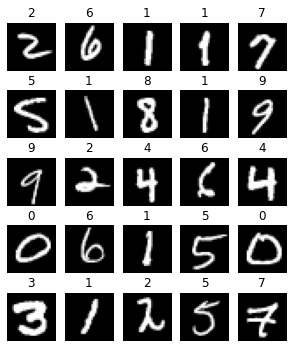

In [4]:
row = 5
col = 5

index = np.random.randint(0,high=len(X_train),size=(row*col,))

plt.figure(figsize=(5,6))
for i in range(row*col):
    plt.subplot(row, col, i + 1)
    image = np.array(X_train.loc[index[i]],dtype='uint8')
    pixels = image.reshape(28,28)
    #print(pixels)
    plt.imshow(pixels,cmap='gray')
    plt.axis("off")
    plt.title(Y_train.loc[index[i]])

plt.show()


In [5]:
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = utils.np_utils.to_categorical(Y_train, num_classes=10)

X_test = X_test.values.reshape(-1,28,28,1)
Y_test = utils.np_utils.to_categorical(Y_test, num_classes=10)

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(name="1-conv2d", filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D(name="1-maxpool", pool_size=(2,2)))

model.add(layers.Conv2D(name="2-conv2d", filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(name="2-maxpool", pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(name="fc1",units=256, activation = "relu"))
model.add(layers.Dense(name="fc2",units=10, activation = "softmax"))

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','categorical_crossentropy']
)


2022-08-01 10:19:59.638541: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1-conv2d (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
1-maxpool (MaxPooling2D)     (None, 14, 14, 32)        0         
_________________________________________________________________
2-conv2d (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
2-maxpool (MaxPooling2D)     (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               803072    
_________________________________________________________________
fc2 (Dense)                  (None, 10)                2

In [7]:
monitor = callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

train_history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test,Y_test),
    callbacks=[monitor],
    verbose=2,
    epochs=100,
)

2022-08-01 10:20:03.165666: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1875/1875 - 17s - loss: 0.2931 - accuracy: 0.9594 - categorical_crossentropy: 0.2931 - val_loss: 0.0809 - val_accuracy: 0.9741 - val_categorical_crossentropy: 0.0809
Epoch 2/100
1875/1875 - 15s - loss: 0.0572 - accuracy: 0.9825 - categorical_crossentropy: 0.0572 - val_loss: 0.0719 - val_accuracy: 0.9785 - val_categorical_crossentropy: 0.0719
Epoch 3/100
1875/1875 - 16s - loss: 0.0481 - accuracy: 0.9851 - categorical_crossentropy: 0.0481 - val_loss: 0.0755 - val_accuracy: 0.9781 - val_categorical_crossentropy: 0.0755
Epoch 4/100
1875/1875 - 16s - loss: 0.0410 - accuracy: 0.9882 - categorical_crossentropy: 0.0410 - val_loss: 0.0394 - val_accuracy: 0.9889 - val_categorical_crossentropy: 0.0394
Epoch 5/100
1875/1875 - 16s - loss: 0.0340 - accuracy: 0.9896 - categorical_crossentropy: 0.0340 - val_loss: 0.0604 - val_accuracy: 0.9849 - val_categorical_crossentropy: 0.0604
Epoch 6/100
1875/1875 - 22s - loss: 0.0368 - accuracy: 0.9903 - categorical_crossentropy: 0.0368 - val_loss: 0

<AxesSubplot:>

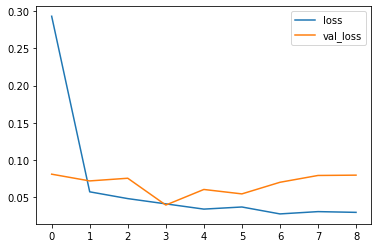

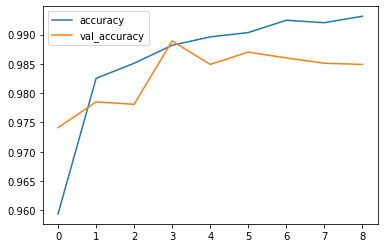

In [8]:
history_frame = pd.DataFrame(train_history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

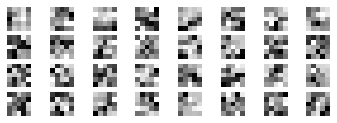

In [9]:
row = 8
col = 4

layer = model.get_layer(name='1-conv2d')
filters, bias = layer.get_weights()

plt.figure(figsize=(6,2))
for i in range(row*col):
    plt.subplot(col, row, i + 1)
    image = filters[:,:,:,i]
    pixels = image.reshape(5,5)
    #print(pixels)
    plt.imshow(pixels,cmap='gray')
    plt.axis("off")
    #print(tf.math.argmax(predict[0]).numpy())
    #plt.title(tf.math.argmax(predict[0]).numpy())

plt.show()


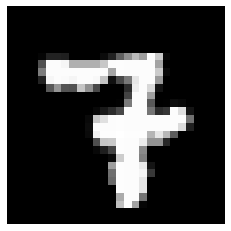

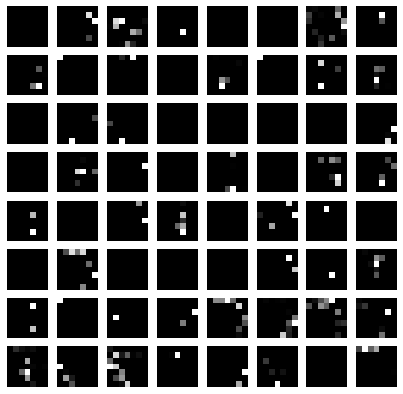

In [10]:
image = X_test[np.random.randint(0,high=len(X_test))]

pixels = image.reshape(28,28)
#print(pixels)
plt.imshow(pixels,cmap='gray')
plt.axis("off")
    
outputs = [model.layers[i+1].output for i in [1,2]]
model2 = tf.keras.Model(inputs=model.inputs,outputs=outputs)
#model2.summary()
feature_maps = model2.predict(image.reshape([1,28,28,1]))

row = 8
col = 8

plt.figure(figsize=(7,7))
for i in range(row*col):
#print(feature_maps[1].shape)
    plt.subplot(row, col, i + 1)
    image = feature_maps[1][:,:,:,i]
    pixels = image.reshape(7,7)
    #print(pixels)
    plt.imshow(pixels,cmap='gray')
    plt.axis("off")
    #print(tf.math.argmax(predict[0]).numpy())
    #plt.title(tf.math.argmax(predict[0]).numpy())

plt.show()

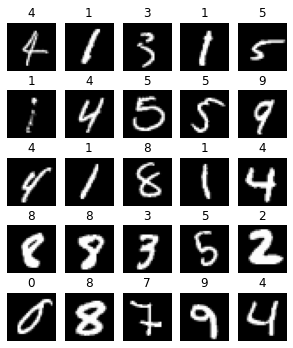

In [11]:
row = 5
col = 5

index = np.random.randint(0,high=len(X_test),size=(row*col,))

plt.figure(figsize=(5,6))
for i in range(row*col):
    plt.subplot(row, col, i + 1)
    image = X_test[index[i]]
    predict = model.predict(image.reshape([1,28,28,1]))
    pixels = image.reshape(28,28)
    #print(pixels)
    plt.imshow(pixels,cmap='gray')
    plt.axis("off")
    #print(tf.math.argmax(predict[0]).numpy())
    plt.title(tf.math.argmax(predict[0]).numpy())

plt.show()
